## Библиотеки


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


## Загрузка Данных

In [2]:
df = pd.read_csv('data/ObesityDataSet.csv', sep=",")

## Просмотр Данных

### Вид таблицы

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Размер

In [4]:
df.shape

(2111, 17)

### Информация и описание

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Наличие дубликатов (имеется)


In [7]:
df.duplicated().sum()

np.int64(24)

### Наличие пустых ячеек (отсуствует)

In [8]:
nan_d = df.isna().sum()
print(nan_d[nan_d>0])

Series([], dtype: int64)


In [9]:
null_d = df.isnull().sum()
print(null_d[null_d>0])

Series([], dtype: int64)


## Построение графиков/схем

### Тепловая карта корелляционной матрицы

In [10]:
num_cols = df.select_dtypes(include='float64').columns

corr_matrix = df[num_cols].corr()

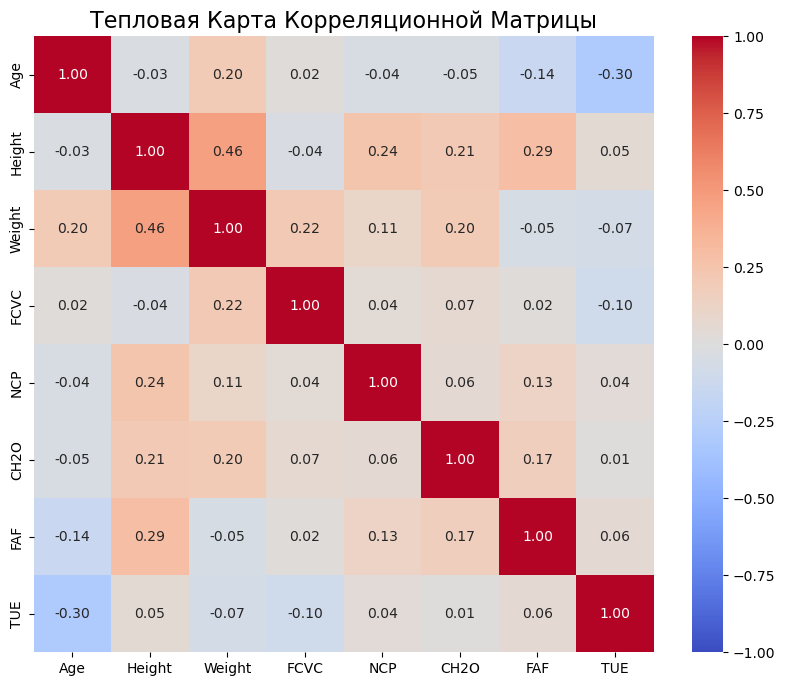

In [11]:
plt.figure(figsize=(10, 8)) # Задаем размер графика для лучшей читаемости

sns.heatmap(
    corr_matrix, 
    annot=True,     # Показывать числовые значения корреляции на карте
    fmt=".2f",      # Формат чисел (2 знака после запятой)
    cmap='coolwarm',# Выбор цветовой палитры (coolwarm хорошо показывает как положительную, так и отрицательную корреляцию)
    vmin=-1,        # Минимальное значение для цветовой шкалы
    vmax=1          # Максимальное значение для цветовой шкалы
)

plt.title('Тепловая Карта Корреляционной Матрицы', fontsize=16) # Добавляем заголовок
plt.show() 

### Целевая переменная (NObeyesdad)

In [12]:
counts = df.NObeyesdad.value_counts()
print(counts)


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


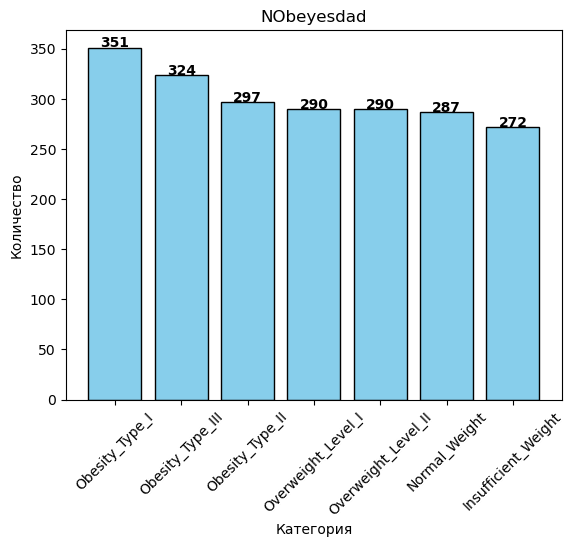

In [13]:

plt.bar(counts.index, counts.values, color='skyblue', edgecolor='black')

for i, v in enumerate(counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('NObeyesdad')
plt.xticks(rotation=45) 
plt.show()


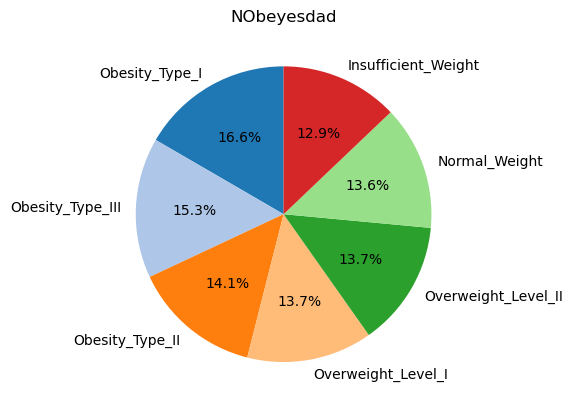

In [14]:
plt.pie(
    counts.values,
    labels=counts.index,      
    autopct='%1.1f%%',        
    startangle=90,            
    colors=plt.cm.tab20.colors
)

plt.title('NObeyesdad')
plt.show()


### Пол (Gender)

<Axes: ylabel='count'>

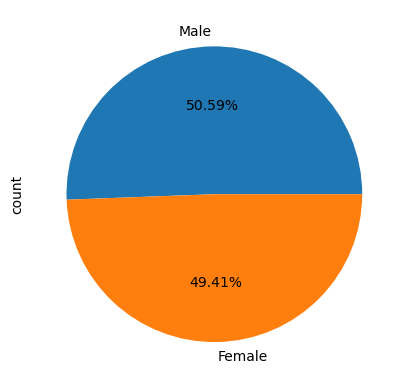

In [15]:
df.Gender.value_counts().plot.pie(autopct='%.2f%%')

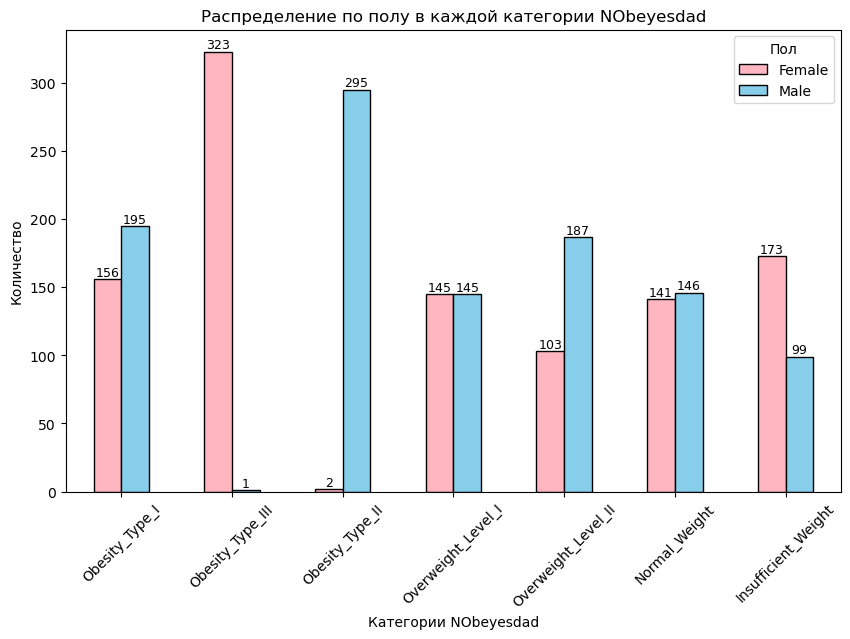

In [16]:
gpGender = df.groupby('NObeyesdad')['Gender'].value_counts().unstack(fill_value=0)

# Сортировка
gpGender['Total'] = gpGender.sum(axis=1)    
gpGender = gpGender.sort_values(by='Total', ascending=False).drop(columns='Total')

# График
ax = gpGender.plot(kind='bar', figsize=(10,6), edgecolor='black', color=['lightpink', 'skyblue'])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9
    )

# Форматирование
plt.ylabel('Количество')
plt.xlabel('Категории NObeyesdad')
plt.title('Распределение по полу в каждой категории NObeyesdad')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.show()


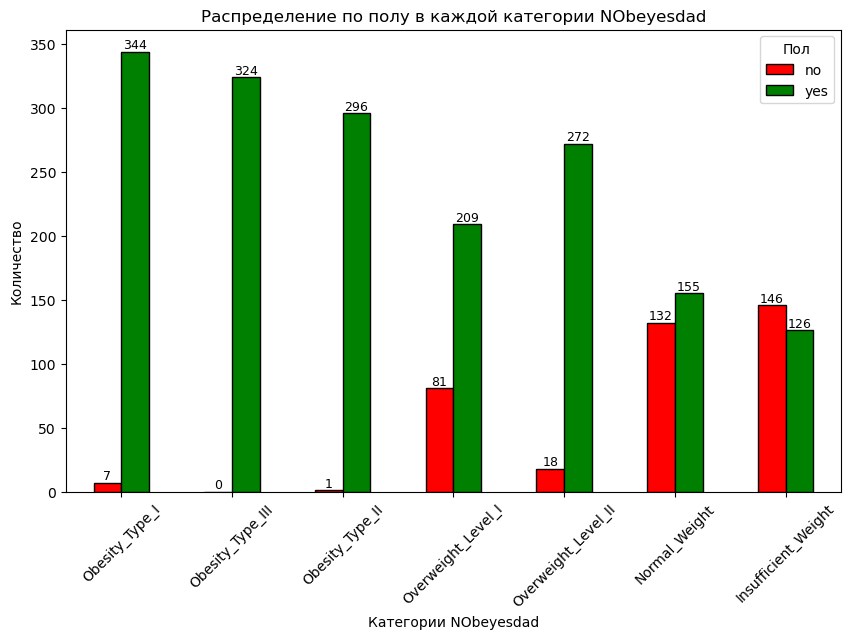

In [17]:
gpfamily_history = df.groupby('NObeyesdad')['family_history_with_overweight'].value_counts().unstack(fill_value=0)

# Сортировка
gpfamily_history['Total'] = gpfamily_history.sum(axis=1)    
gpfamily_history = gpfamily_history.sort_values(by='Total', ascending=False).drop(columns='Total')

# График
ax = gpfamily_history.plot(kind='bar', figsize=(10,6), edgecolor='black', color=['red', 'green'])

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9
    )

# Форматирование
plt.ylabel('Количество')
plt.xlabel('Категории NObeyesdad')
plt.title('Распределение по полу в каждой категории NObeyesdad')
plt.xticks(rotation=45)
plt.legend(title='Пол')
plt.show()
